### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [118]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import estimator_html_repr
from IPython.core.display import HTML
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import classification_report

# 3.

## Loading Diamonds dataset

In [2]:
data =sns.load_dataset('diamonds')

### First glance to data:

In [3]:
data.head(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Having the min value of x,y,z does not make sense because they are dimensions of diamond

## Check for missing values

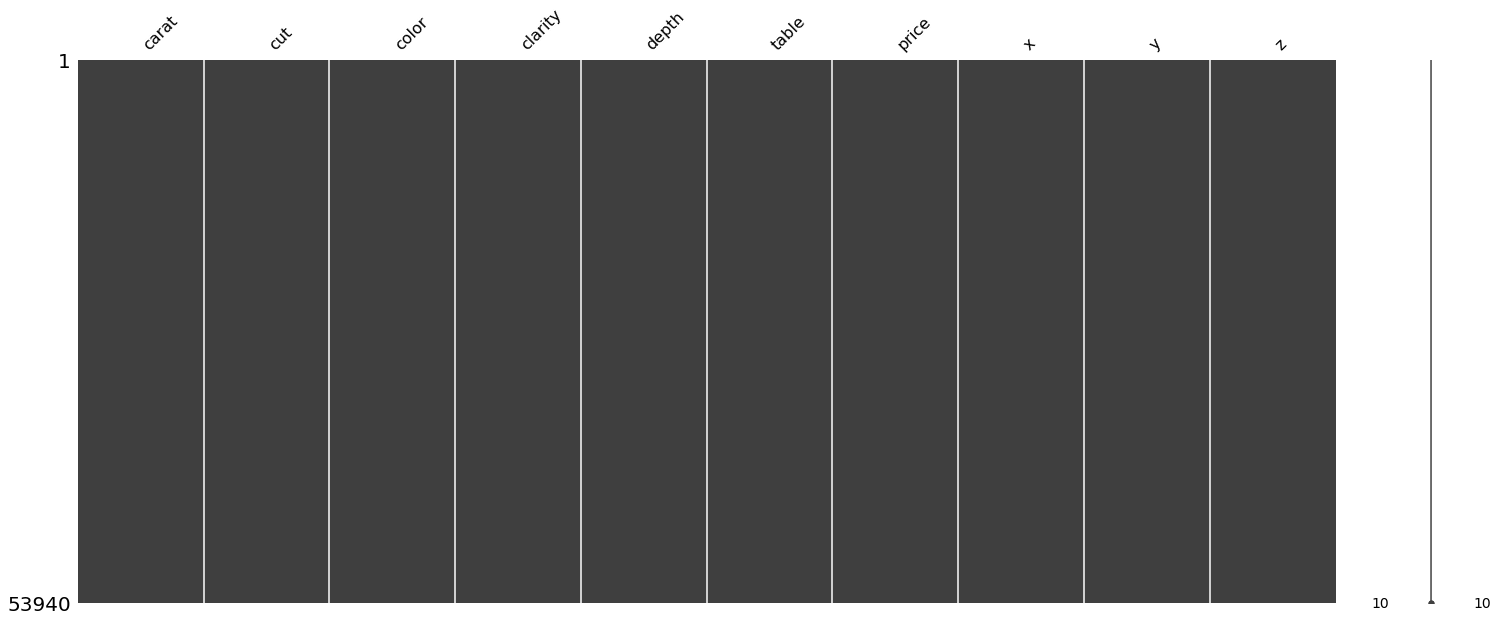

In [5]:
missingno.matrix(data)

### Just for being sure:

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Good we do not have any missing values

## Data Cleaning

### Dropping columnns that contain zero for x,y,z columns

In [11]:
zeros = data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]
print(len(zeros))
zeros


20


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


### We could replace them with mean but I prefer dropping them since they are less compared to data I will drop them

In [14]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]


## Visualizations for better understanding

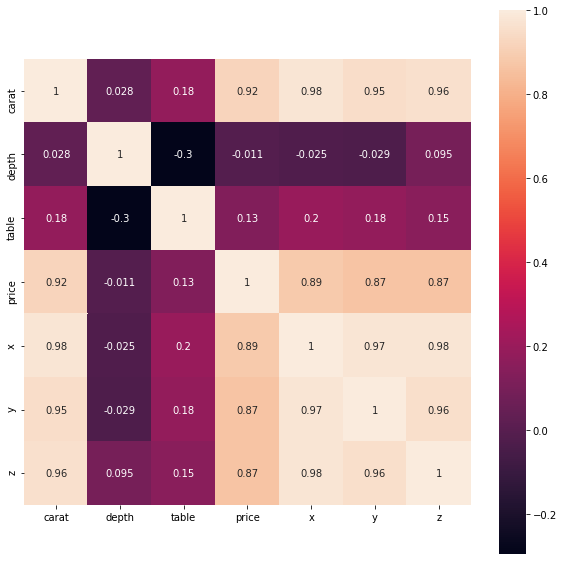

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

#### Conclusion: There is strong positive correlation between carat, dimensions of diamond and its price.

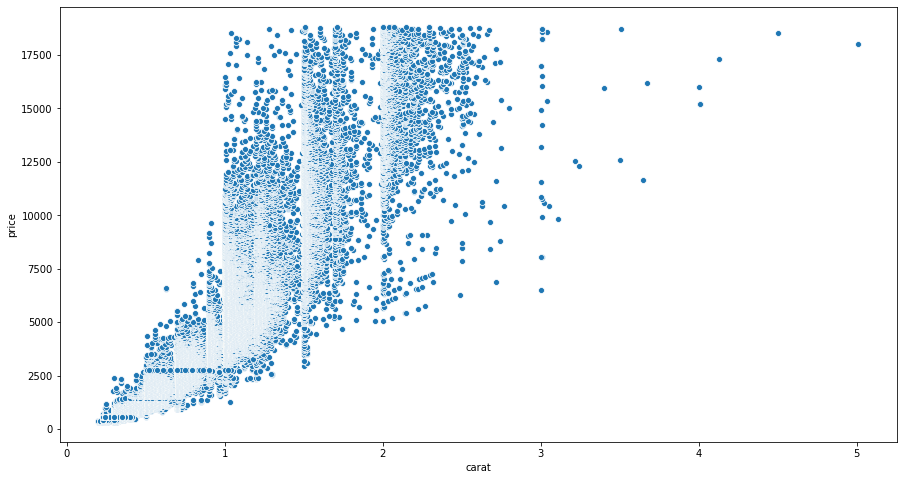

In [38]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.scatterplot(x='carat', y='price', data=data, marker='o' )

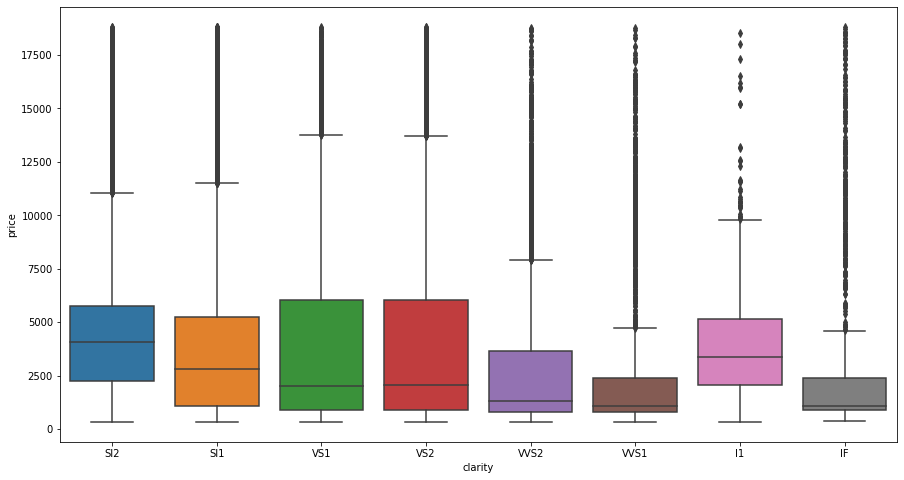

In [31]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.boxplot(x='clarity', y='price', data=data )


['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1']
[13065, 12258, 9194, 8171, 5066, 3655, 1790, 741]


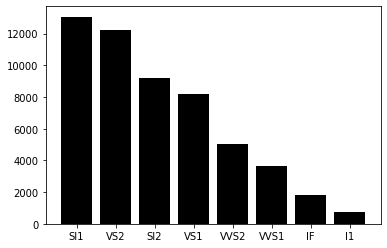

In [8]:
clarityindexes = data["clarity"].value_counts().index.tolist()
claritycount = data["clarity"].value_counts().values.tolist()

print(clarityindexes)
print(claritycount)
plt.bar(clarityindexes, claritycount, color='black')
plt.show()


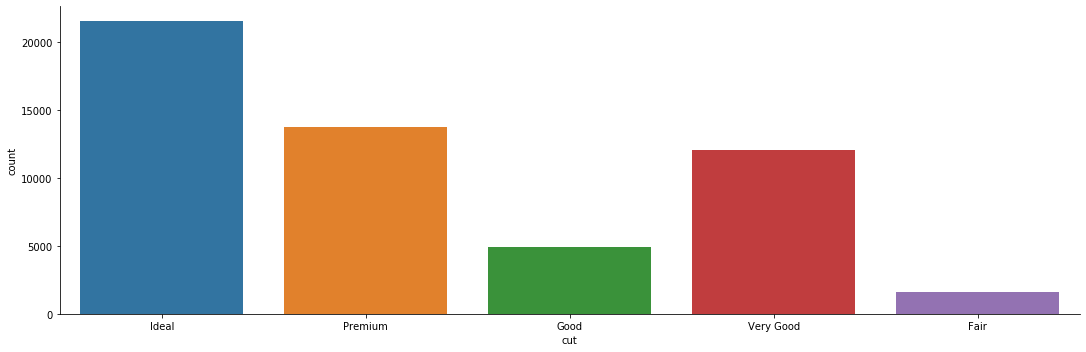

In [40]:
sns.factorplot(x='cut', data=data , kind='count',aspect=3)


## Feature Engineering

 Istead of having 3 seperate dimensions, we can calculate the volume of diamond. Multiplying them will not give us their real volumes but it will close with real values.

In [42]:
data['volume'] = data['x']*data['y']*data['z']

In [94]:
data.sort_values('volume',ascending = False).head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,3840.598060
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,838.502400
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,838.502400
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,790.133208
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,698.455296
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,633.355000
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,631.894380
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31,627.841214
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,621.496512
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13,592.934058


It seems we have an outlier in data, 3840 mm3 does not seem quite realistic, so we are dropping it:

In [100]:
i = data[(data.volume > 3000)].index
data = data.drop(i)

In [101]:
data.sort_values('volume',ascending = False).head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,838.502400
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,838.502400
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,790.133208


We are good to go

(0, 18000)

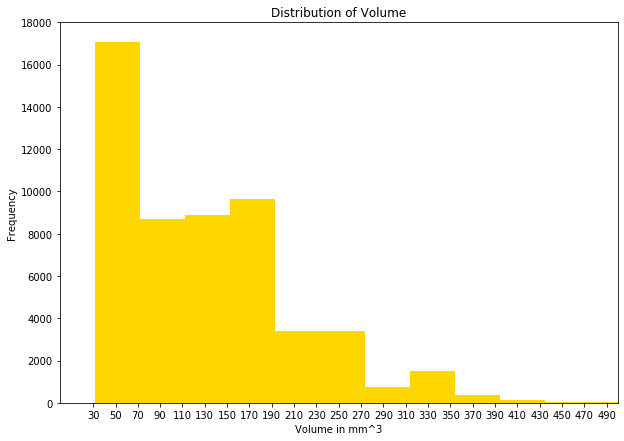

In [111]:
plt.figure(figsize=(10,7))
plt.hist( x=data['volume'] , bins=20 ,color='gold')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Volume')

plt.xticks(np.arange(30,500,20))
plt.xlim(0,500)
plt.ylim(0,18000)

## Creating Pipeline

In [112]:
numeric_transformer=Pipeline(steps=[ 
    ('scaler', StandardScaler())
])

categorical_transformer=Pipeline(steps=[ 
    ('one_hot_encoding', OneHotEncoder())
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ['carat', 'volume']),
    ('categorical', categorical_transformer, ['clarity', 'cut', 'color'])
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regressor', KNeighborsRegressor(n_neighbors=11))
])

In [113]:
HTML(estimator_html_repr(model_pipeline))

In [114]:
X = data[['carat', 'volume', 'clarity', 'cut','color']]
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [115]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'volume']),
                                                 ('categorical',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder())]),
                                                  ['clarity', 'cut',
                                                   'color'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=11))])

In [116]:
res =model_pipeline.predict(X_test)

In [117]:
mse = mean_squared_error(y_test, res)
mae = mean_absolute_error(y_test, res)
rmse = mean_squared_error(y_test, res)**0.5
r2 = r2_score(y_test, res)


print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


MSE    : 465097.43 
MAE    : 336.46 
RMSE   : 681.98 
R2     : 0.97 


### With calculated metrics, we can say that our KNeighborsRegressor is giving satisfactory results.